# Chapter 2: Bayesian Data Analysis

**From Statistical Rethinking by Richard McElreath**

These notes faithfully follow your handwritten notes structure:
- Probability as degree of plausibility (Laplace–Jeffreys–Cox–Jaynes)
- Competing conjectures
- Joint distributions and marginalisation
- Two views of likelihood
- Predictive distributions
- Panda Problem with genetic test (sequential updating)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(42)
rng = np.random.default_rng(42)

plt.style.use('default')
%matplotlib inline

print('✓ Imports loaded')

✓ Imports loaded


---

## 1. Probability and Uncertainty

Probability represents **uncertainty in parameters**, arising from:
- Measurement errors
- Imperfections in the model

### Multiple Competing Conjectures

- Multiple conjectures (hypotheses) considered **simultaneously**
- All compete at the same time

> **Key principle:** A conjecture that produces the data in more ways is more probable

### Interpretation of Probability

**NOT long-run frequency!**

Follows the **Laplace–Jeffreys–Cox–Jaynes** interpretation:

> **Probability = Degree of plausibility**

This means parameters can have probability distributions (Bayesian view).

---

## 2. Core Bayesian Concepts

### Parameter
Every discrete value of a parameter is a **conjecture**.

### Likelihood P(D | θ)
- **Relative number of ways** a parameter value can produce the data
- Measures how **compatible** the data is with a conjecture

$$P(D \mid \theta)$$

### Prior P(θ)
- Prior possibilities of all parameter values
- Encodes plausibility **before seeing data**

$$P(\theta)$$

### Posterior P(θ | D)
- Updated probability of parameter values
- After conditioning on observed data

$$P(\theta \mid D)$$

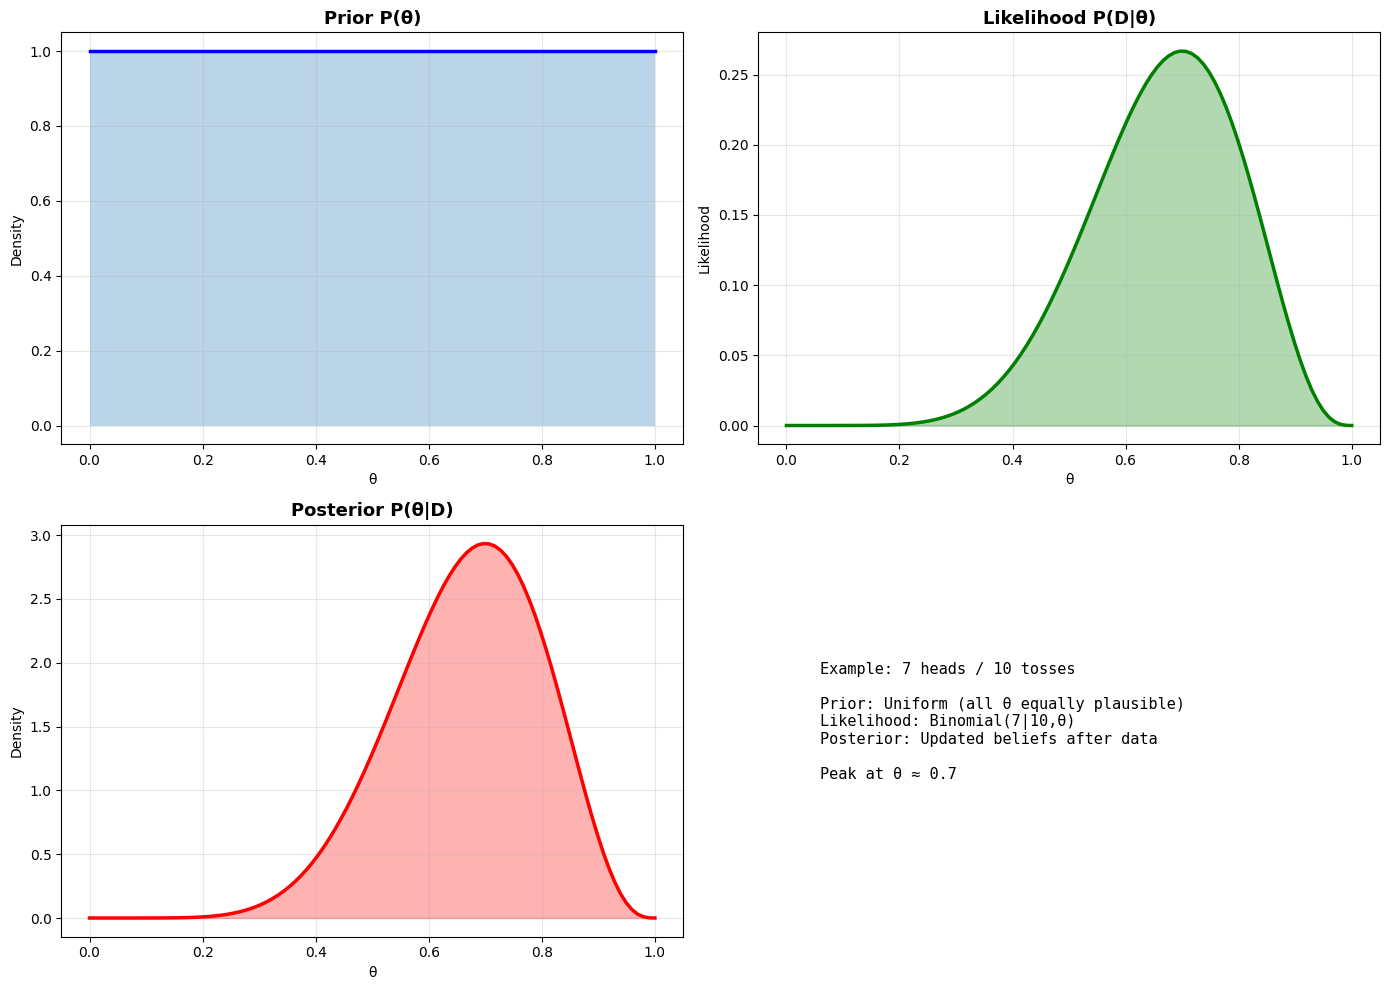

In [2]:
# Visualize the four core concepts
theta_values = np.linspace(0, 1, 100)
n_heads, n_tosses = 7, 10

# Prior: Uniform
prior = np.ones_like(theta_values)
prior = prior / np.trapezoid(prior, theta_values)

# Likelihood
likelihood = stats.binom.pmf(n_heads, n_tosses, theta_values)

# Posterior
posterior = prior * likelihood
posterior = posterior / np.trapezoid(posterior, theta_values)

# Plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(theta_values, prior, 'b-', linewidth=2.5)
axes[0, 0].fill_between(theta_values, prior, alpha=0.3)
axes[0, 0].set_title('Prior P(θ)', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('θ')
axes[0, 0].set_ylabel('Density')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(theta_values, likelihood, 'g-', linewidth=2.5)
axes[0, 1].fill_between(theta_values, likelihood, alpha=0.3, color='g')
axes[0, 1].set_title('Likelihood P(D|θ)', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('θ')
axes[0, 1].set_ylabel('Likelihood')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(theta_values, posterior, 'r-', linewidth=2.5)
axes[1, 0].fill_between(theta_values, posterior, alpha=0.3, color='r')
axes[1, 0].set_title('Posterior P(θ|D)', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('θ')
axes[1, 0].set_ylabel('Density')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].axis('off')
axes[1, 1].text(0.1, 0.5, f'''Example: 7 heads / 10 tosses

Prior: Uniform (all θ equally plausible)
Likelihood: Binomial(7|10,θ)
Posterior: Updated beliefs after data

Peak at θ ≈ 0.7
''', fontsize=11, family='monospace', verticalalignment='center')

plt.tight_layout()
plt.show()

---

## 3. Discrete Parameter Case

Let: $$\theta \in \{\theta_1, \theta_2, \dots, \theta_n\}$$

Posterior:
$$P(\theta_i \mid y) = \frac{P(y \mid \theta_i) P(\theta_i)}{P(y)}$$

Where:
$$P(y) = \sum_i P(y \mid \theta_i) P(\theta_i)$$

### Interpretation of Denominator

The denominator P(y) has three equivalent interpretations:
1. **Average likelihood over the prior**
2. **Expected likelihood**
3. **Marginalisation over θ**

This ensures probabilities sum to 1.

---

## 4. Likelihood as a Generative Object

Bayesian models are **generative**.

### Two Views of Likelihood

**View 1: Data → Parameter (Inference)**
- Given data, how compatible is each parameter?
- Used in posterior computation

**View 2: Parameter → Data (Prediction)**
- Given parameter, probability of observing data
- Used in prediction

> **Key insight:** Prediction = averaging likelihood over parameter distribution

---

## 5. Continuous Parameters

For continuous parameters:

$$P(\theta \mid y) = \frac{P(y \mid \theta) P(\theta)}{\int P(y \mid \theta) P(\theta) \, d\theta}$$

- Integral replaces summation
- Still marginalisation over θ

### Joint Distribution

The joint distribution contains **complete information**.

From joint P(y,θ) = P(y|θ)P(θ), we obtain:
- Marginal distributions
- Predictive distributions

---

## 6. Predictive Distributions

### Prior Predictive
Before observing data:

$$P(y) = \int P(y \mid \theta) P(\theta) \, d\theta$$

(average likelihood over prior)

### Posterior Predictive
After observing data:

$$P(y_{new} \mid y) = \int P(y_{new} \mid \theta) P(\theta \mid y) \, d\theta$$

(average likelihood over posterior)

---

# Worked Example: The Panda Problem

Now we apply everything to the complete panda problem with **genetic test**!

## Problem Statement

- Two panda species: **A** and **B**
- Both equally common
- Twin birth rates:
  - $P(T \mid S_A) = 0.1$
  - $P(T \mid S_B) = 0.2$
- Genetic test:
  - $P(A^+ \mid S_A) = 0.8$ (true positive)
  - $P(A^+ \mid S_B) = 0.35$ (false positive)

**Observations (sequential):**
1. Panda gives birth to twins
2. Genetic test positive for Species A

**Questions:**
- What is P(Species) after each observation?
- What is P(next birth = twins)?

## Step 1: Prior

$$P(S_A) = 0.5, \quad P(S_B) = 0.5$$

In [3]:
print("="*70)
print("PANDA PROBLEM: Sequential Bayesian Updating")
print("="*70)

# Step 1: Prior
p_A = 0.5
p_B = 0.5

print("\nSTEP 1: PRIOR")
print(f"P(Species A) = {p_A}")
print(f"P(Species B) = {p_B}")

PANDA PROBLEM: Sequential Bayesian Updating

STEP 1: PRIOR
P(Species A) = 0.5
P(Species B) = 0.5


## Step 2: Posterior After Twin Birth

$$P(S_A \mid T) = \frac{0.1 \times 0.5}{0.1 \times 0.5 + 0.2 \times 0.5} = 0.333$$

$$P(S_B \mid T) = 0.667$$

**Intuition:** Twin birth favors Species B!

In [4]:
# Step 2: Update after twins
p_twins_given_A = 0.1
p_twins_given_B = 0.2

p_twins = p_twins_given_A * p_A + p_twins_given_B * p_B
p_A_after_twins = (p_twins_given_A * p_A) / p_twins
p_B_after_twins = (p_twins_given_B * p_B) / p_twins

print("\nSTEP 2: AFTER TWIN BIRTH")
print(f"P(Species A | Twins) = {p_A_after_twins:.3f}")
print(f"P(Species B | Twins) = {p_B_after_twins:.3f}")
print(f"Species B is {p_B_after_twins/p_A_after_twins:.1f}× more likely!")


STEP 2: AFTER TWIN BIRTH
P(Species A | Twins) = 0.333
P(Species B | Twins) = 0.667
Species B is 2.0× more likely!


## Step 3: Posterior Predictive After Twin Birth

$$P(T_{next}) = 0.1 \times 0.333 + 0.2 \times 0.667 = 0.167$$

Prior predictive was 0.150, so twins increased!

In [5]:
# Step 3: Posterior predictive
p_twins_prior_pred = 0.1 * 0.5 + 0.2 * 0.5
p_twins_post_pred = 0.1 * p_A_after_twins + 0.2 * p_B_after_twins

print("\nSTEP 3: POSTERIOR PREDICTIVE")
print(f"Prior predictive:     {p_twins_prior_pred:.3f}")
print(f"After twins:          {p_twins_post_pred:.3f}")
print(f"Change: +{100*(p_twins_post_pred-p_twins_prior_pred)/p_twins_prior_pred:.1f}%")


STEP 3: POSTERIOR PREDICTIVE
Prior predictive:     0.150
After twins:          0.167
Change: +11.1%


## Step 4: Genetic Test Evidence

Test characteristics:
- $P(A^+ \mid S_A) = 0.8$
- $P(A^+ \mid S_B) = 0.35$

**Key:** Posterior from Step 2 becomes new prior!
$$P(S_A) = 0.333, \quad P(S_B) = 0.667$$

This is **sequential updating**!

## Step 5: Posterior After Genetic Test

$$P(S_A \mid A^+) = \frac{0.8 \times 0.333}{0.8 \times 0.333 + 0.35 \times 0.667} = 0.533$$

$$P(S_B \mid A^+) = 0.467$$

**Intuition:** Test shifts beliefs back toward A!

In [6]:
# Step 5: Update after genetic test
p_test_A_given_A = 0.8
p_test_A_given_B = 0.35

p_test_A = p_test_A_given_A * p_A_after_twins + p_test_A_given_B * p_B_after_twins
p_A_final = (p_test_A_given_A * p_A_after_twins) / p_test_A
p_B_final = (p_test_A_given_B * p_B_after_twins) / p_test_A

print("\nSTEP 5: AFTER GENETIC TEST")
print(f"P(Species A | Test A+) = {p_A_final:.3f}")
print(f"P(Species B | Test A+) = {p_B_final:.3f}")
print(f"\nShift: A went {p_A_after_twins:.3f} → {p_A_final:.3f}")


STEP 5: AFTER GENETIC TEST
P(Species A | Test A+) = 0.533
P(Species B | Test A+) = 0.467

Shift: A went 0.333 → 0.533


## Step 6: Updated Posterior Predictive

$$P(T_{next}) = 0.533 \times 0.1 + 0.467 \times 0.2 = 0.147$$

Evolution: 0.15 → 0.167 → 0.147

In [7]:
# Step 6: Final posterior predictive
p_twins_final_pred = 0.1 * p_A_final + 0.2 * p_B_final

print("\nSTEP 6: FINAL POSTERIOR PREDICTIVE")
print(f"Prior predictive:     {p_twins_prior_pred:.3f}")
print(f"After twins:          {p_twins_post_pred:.3f}")
print(f"After test:           {p_twins_final_pred:.3f}")
print("\nData pushed predictions up, then back down!")


STEP 6: FINAL POSTERIOR PREDICTIVE
Prior predictive:     0.150
After twins:          0.167
After test:           0.147

Data pushed predictions up, then back down!


## Final Summary

### Parameter Evolution
- $S_A$: 0.5 → 0.33 → 0.533
- $S_B$: 0.5 → 0.67 → 0.467

### Prediction Evolution
$$P(T_{next}): 0.15 \rightarrow 0.167 \rightarrow 0.147$$

### Core Takeaway
> Evidence updates parameter plausibility.  
> Updated parameters update predictions.  
> This is sequential Bayesian learning!

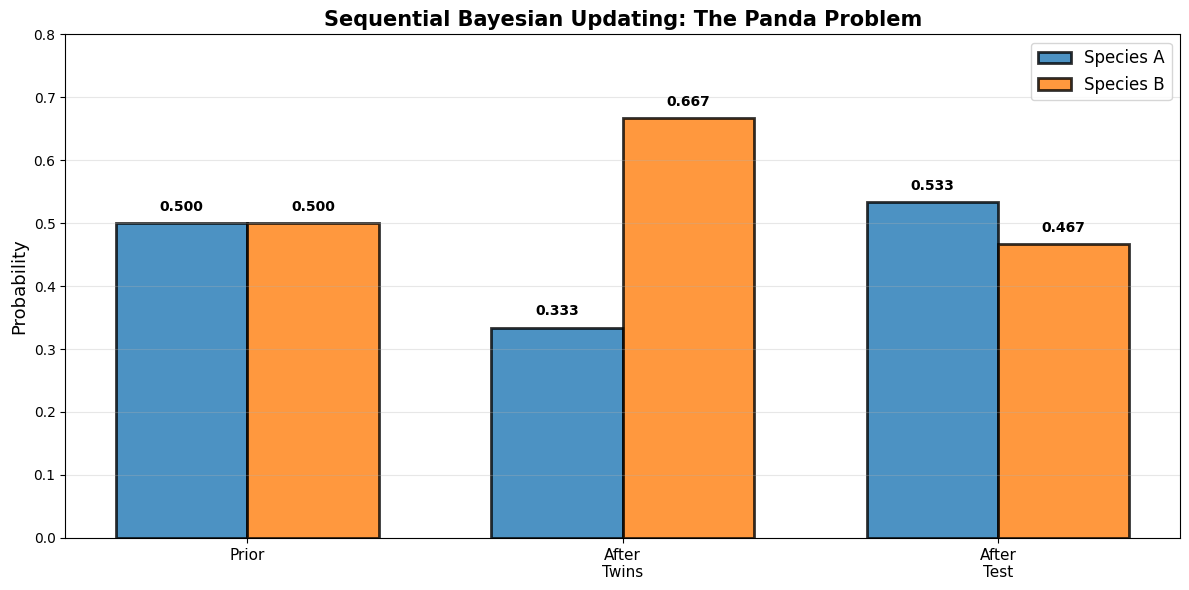

COMPLETE! This is Bayesian inference in action.


In [8]:
# Final visualization
stages = ['Prior', 'After\nTwins', 'After\nTest']
p_A_evolution = [0.5, p_A_after_twins, p_A_final]
p_B_evolution = [0.5, p_B_after_twins, p_B_final]

fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(stages))
width = 0.35

ax.bar(x - width/2, p_A_evolution, width, label='Species A', 
       color='#1f77b4', edgecolor='black', linewidth=2, alpha=0.8)
ax.bar(x + width/2, p_B_evolution, width, label='Species B',
       color='#ff7f0e', edgecolor='black', linewidth=2, alpha=0.8)

ax.set_ylabel('Probability', fontsize=13)
ax.set_title('Sequential Bayesian Updating: The Panda Problem', 
             fontsize=15, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(stages, fontsize=11)
ax.legend(fontsize=12)
ax.set_ylim(0, 0.8)
ax.grid(True, alpha=0.3, axis='y')

for i, (va, vb) in enumerate(zip(p_A_evolution, p_B_evolution)):
    ax.text(i - width/2, va + 0.02, f'{va:.3f}', 
            ha='center', fontsize=10, fontweight='bold')
    ax.text(i + width/2, vb + 0.02, f'{vb:.3f}', 
            ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("="*70)
print("COMPLETE! This is Bayesian inference in action.")
print("="*70)